In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [38]:
x_begin = -1
x_end = 1
t_begin = 0
t_end = 4

lamda = 1

N_x = 100
N_t = 800
T = np.linspace(t_begin, t_end, N_t)
X = np.linspace(x_begin, x_end, N_x)
U = [[0 for i in range(N_x)] for j in range(N_t)]
len(U[150][:])

100

<function matplotlib.pyplot.show(close=None, block=None)>

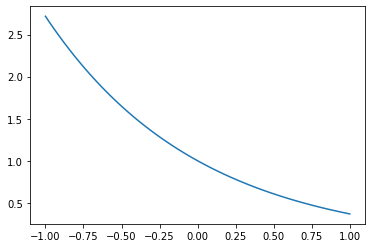

In [39]:
for i in range(N_x):
    U[0][i] = math.exp(-X[i])
    """ if (X[i] > -0.1) and (X[i] < 0.1):
        U[0][i] = 1
    else:
        U[0][i] = 0"""
        
plt.plot(X, U[0])
plt.show

In [4]:
h = (x_end - x_begin)/N_x
tao = (t_end - t_begin)/N_t
sigma = lamda*tao/h
h,tao,sigma

(0.01, 0.002, 0.2)

In [13]:
sigma = lamda*tao/h

def reshenie(a_2, sigma):
    M = [[1, 1, 1], [1, 0, -1], [1, 0, 1]]
    V = [1 - a_2, sigma - 2*a_2, sigma**2 - 4*a_2]
    return np.linalg.solve(M, V)

for tt in range(N_t - 1):
    U[tt + 1][0] = U[tt][0]
    U[tt + 1][1] = U[tt][1]
    U[tt + 1][N_x - 1] = U[tt][N_x - 1]
    
    for i in range(N_x - 3):
        ii = i + 2
        # Русанов
        a_2 = sigma*(sigma**2 - 1)/6
        a = reshenie(a_2, sigma)
        tmp = a_2 * U[tt][ii - 2] + a[0]*U[tt][ii - 1] + a[1]*U[tt][ii] + a[2]*U[tt][ii + 1]
        
        if (tmp - U[tt + 1][ii - 1])*(U[tt][ii] - U[tt][ii - 1]) < 0:
            # Лакса-Вендрофф
            a_2 = 0
            a = reshenie(a_2, sigma)
            tmp = a_2 * U[tt][ii - 2] + a[0]*U[tt][ii - 1] + a[1]*U[tt][ii] + a[2]*U[tt][ii + 1]
            
            if (tmp - U[tt + 1][ii - 1])*(U[tt][ii] - U[tt][ii - 1]) < 0:
                # Бим-Уорминг
                a_2 = sigma*(sigma - 1)/2
                a = reshenie(a_2, sigma)
                tmp = a_2 * U[tt][ii - 2] + a[0]*U[tt][ii - 1] + a[1]*U[tt][ii] + a[2]*U[tt][ii + 1]
                
        U[tt + 1][ii] = tmp

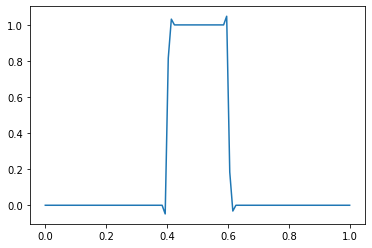

In [14]:
plt.plot(X, U[1])
plt.show()

In [40]:
h = (x_end - x_begin)/N_x
tao = (t_end - t_begin)/N_t

for tt in range(N_t - 1):
    U[tt + 1][0] = U[tt][0]
    U[tt + 1][N_x - 1] = U[tt][N_x - 1]

    for i in range(N_x - 2):
        ii = i + 1
        lmbd = (1-X[ii])/2
        sig = abs(lmbd)*tao/h
        if lmbd >= 0:
            U[tt+1][ii] = (1 - sig)*U[tt][ii] + sig*U[tt][ii-1]
        else:
            U[tt+1][ii] = (1 - sig)*U[tt][ii] + sig*U[tt][ii+1]

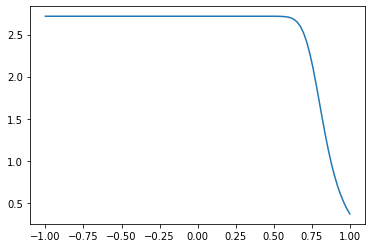

In [44]:
plt.plot(X, U[799])
plt.show()

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [46]:
x_begin = -1
x_end = 1
t_begin = 0
t_end = 4

lamda = 1

N_x = 100
N_t = 800
T = np.linspace(t_begin, t_end, N_t)
X = np.linspace(x_begin, x_end, N_x)
U = [[0 for i in range(N_x)] for j in range(N_t)]
len(U[150][:])

100

<function matplotlib.pyplot.show(close=None, block=None)>

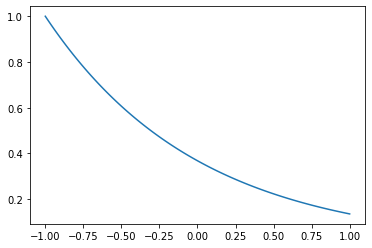

In [51]:
for i in range(N_x):
    U[0][i] = math.exp(-X[i]-1)
    """ if (X[i] > -0.1) and (X[i] < 0.1):
        U[0][i] = 1
    else:
        U[0][i] = 0"""
        
plt.plot(X, U[0])
plt.show

In [52]:
h = (x_end - x_begin)/N_x
tao = (t_end - t_begin)/N_t

for tt in range(N_t - 1):
    U[tt + 1][0] = U[tt][0]
    U[tt + 1][N_x - 1] = U[tt][N_x - 1]

    for i in range(N_x - 2):
        ii = i + 1
        lmbd = (1-X[ii])/2
        sig = abs(lmbd)*tao/h
        if lmbd >= 0:
            U[tt+1][ii] = (1 - sig)*U[tt][ii] + sig*U[tt][ii-1]
        else:
            U[tt+1][ii] = (1 - sig)*U[tt][ii] + sig*U[tt][ii+1]

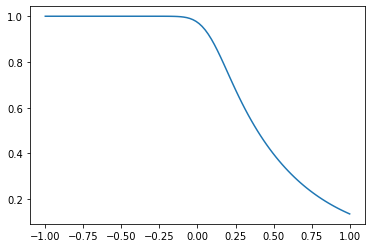

In [56]:
plt.plot(X, U[300])
plt.show()